In [306]:
import pandas as pd

df = pd.read_csv("source.csv")
df.drop(["Unnamed: 0"], axis=1, inplace=True)

<Axes: xlabel='surface_total', ylabel='price'>

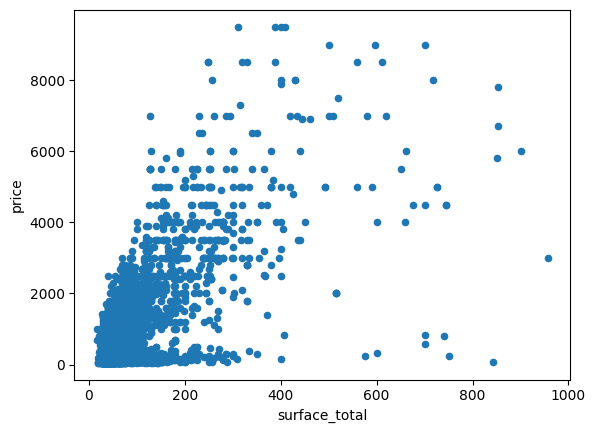

In [307]:
# Tenemos varios outliers en relación a superficie de los departamentos

#df = df.loc[df.surface_total < 400]

# Precio por superficie
var = 'surface_total'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price')

In [308]:
from sklearn.model_selection import train_test_split
y = df.price
X = df.drop(["price"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [309]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Standard scaling of variables
#X_train[["surface_total", "ambience"]] = scaler.fit_transform(X_train[["surface_total", "ambience"]])
#X_test[["surface_total", "ambience"]] = scaler.fit_transform(X_test[["surface_total", "ambience"]])

In [310]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.604471069108884

In [311]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.0005)
lasso_model = lasso.fit(X_train, y_train)
lasso_model.score(X_test, y_test)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.740e+08, tolerance: 4.474e+05
  model = cd_fast.enet_coordinate_descent(


0.6035335005874196

In [312]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
enet_model = enet.fit(X_train, y_train)
enet_model.score(X_test, y_test)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.058e+08, tolerance: 4.474e+05
  model = cd_fast.enet_coordinate_descent(


0.6046392610741327

In [313]:
from sklearn.kernel_ridge import KernelRidge

krr = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
krr_model = krr.fit(X_train, y_train)
krr_model.score(X_test, y_test)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:248: LinAlgWarning: Ill-conditioned matrix (rcond=7.63176e-22): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


0.6632090851762353

In [323]:
from sklearn.ensemble import GradientBoostingRegressor

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost_model = GBoost.fit(X_train, y_train)
GBoost_model.score(X_test, y_test)

0.6623642269766469

In [342]:
test = X_test.sample(1)
prediction = GBoost_model.predict(test)
print(prediction)
test[["surface_total"]]


[341.514076]


,surface_total
941,29


In [316]:
from sklearn.ensemble import GradientBoostingRegressor

GBoost = GradientBoostingRegressor()
GBoost_model = GBoost.fit(X_train, y_train)
GBoost_model.score(X_test, y_test)

0.6555933437001834

In [317]:
from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor(max_depth=2, random_state=0)
rforest_model = rforest.fit(X_train, y_train)
rforest_model.score(X_test, y_test)

0.5337295503389263

In [318]:
from sklearn.ensemble import HistGradientBoostingRegressor

HGBoost = HistGradientBoostingRegressor()
HGBoost_model = HGBoost.fit(X_train, y_train)
HGBoost_model.score(X_test, y_test)

0.6603856987309253

In [319]:
from sklearn.ensemble import BaggingRegressor

Bagging = BaggingRegressor()
Bagging_model = Bagging.fit(X_train, y_train)
Bagging_model.score(X_test, y_test)

0.6072720074848454

In [320]:
from sklearn.ensemble import AdaBoostRegressor

AdaBoost = AdaBoostRegressor()
AdaBoost_model = AdaBoost.fit(X_train, y_train)
AdaBoost_model.score(X_test, y_test)

0.5708187580083741

In [321]:
from sklearn.ensemble import ExtraTreesRegressor

ExtraTrees = ExtraTreesRegressor()
ExtraTrees_model = ExtraTrees.fit(X_train, y_train)
ExtraTrees_model.score(X_test, y_test)

0.6317247492102687

In [322]:
from sklearn.ensemble import StackingRegressor

#Stacking = StackingRegressor()
#Stacking_model = Stacking.fit(X_train, y_train)
#Stacking_model.score(X_test, y_test)